# Jamboree - Business Case Study

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 

## Problem Statement


Analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

### Following are the analysis made in this notebook

- Chance of Admit using various factors lile CGPA, TOEFL ,Research

- Univariate and bivariate analysis

- Exploratory Data analaysis - data preprocesing , data cleaning , outlier detection and treatment

- Graphs like pairplots, distplot, heatmaps, boxplot, histogram to show the influence of features- independent variable and dependent variables

- Feature engineering, data visualization 

- ML model building with and without scaling the independent variables

- ML model build using sklearn and stasmodel.

- Finding the VIF using RFE, and selecting the best feature for selection

- Recommendations & Observations

In [127]:
#impoorting Libraties

import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
import seaborn as sbn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#statastics 
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence

from matplotlib.ticker import FormatStrFormatter
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

from sklearn.preprocessing import OneHotEncoder

from sklearn import preprocessing


from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical

# from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest # cdf

from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF

In [128]:
## importing dataset

df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

In [129]:
# Printing first 5 rows in dataframe
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [130]:
# Shape of dataframe
df.shape

(500, 9)

In [131]:
# Columns in yulu dataset
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [132]:
# Finding any null values present in dataset
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [133]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [134]:
#Category columns
category_columns=df.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index([], dtype='object')

We can see , there are no category columns and only numerical columns present in the dataset

In [135]:
#Numerical columns
category_columns=df.dtypes!="O"
num_cols= category_columns[category_columns].index
num_cols

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [136]:
columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
for col in columns:
  print("Value Counts in", col)
  print("")
  print(df[col].value_counts())
  print("-------"*20)

Value Counts in Serial No.

1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in GRE Score

312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------


In [137]:
df_copy = df.copy().corr()
fig = px.imshow(df_copy, text_auto=True, width=1000, height=600)
fig.show()

Fro the above heatmap, we can assume that the CGPA , GRE score has high influence in Chance of Admit

## Univariate Analysis


<Figure size 1008x3600 with 0 Axes>

j=elks:: 0


Text(0.5, 1.0, 'GRE Score')

Text(0.5, 1.0, 'GRE Score Spread')

j=elks:: 1


Text(0.5, 1.0, 'TOEFL Score')

Text(0.5, 1.0, 'TOEFL Score Spread')

j=elks:: 2


Text(0.5, 1.0, 'University Rating')

Text(0.5, 1.0, 'University Rating Spread')

j=elks:: 3


Text(0.5, 1.0, 'SOP')

Text(0.5, 1.0, 'SOP Spread')

j=elks:: 4


Text(0.5, 1.0, 'LOR ')

Text(0.5, 1.0, 'LOR  Spread')

j=elks:: 5


Text(0.5, 1.0, 'CGPA')

Text(0.5, 1.0, 'CGPA Spread')

j=elks:: 6


Text(0.5, 1.0, 'Research')

Text(0.5, 1.0, 'Research Spread')

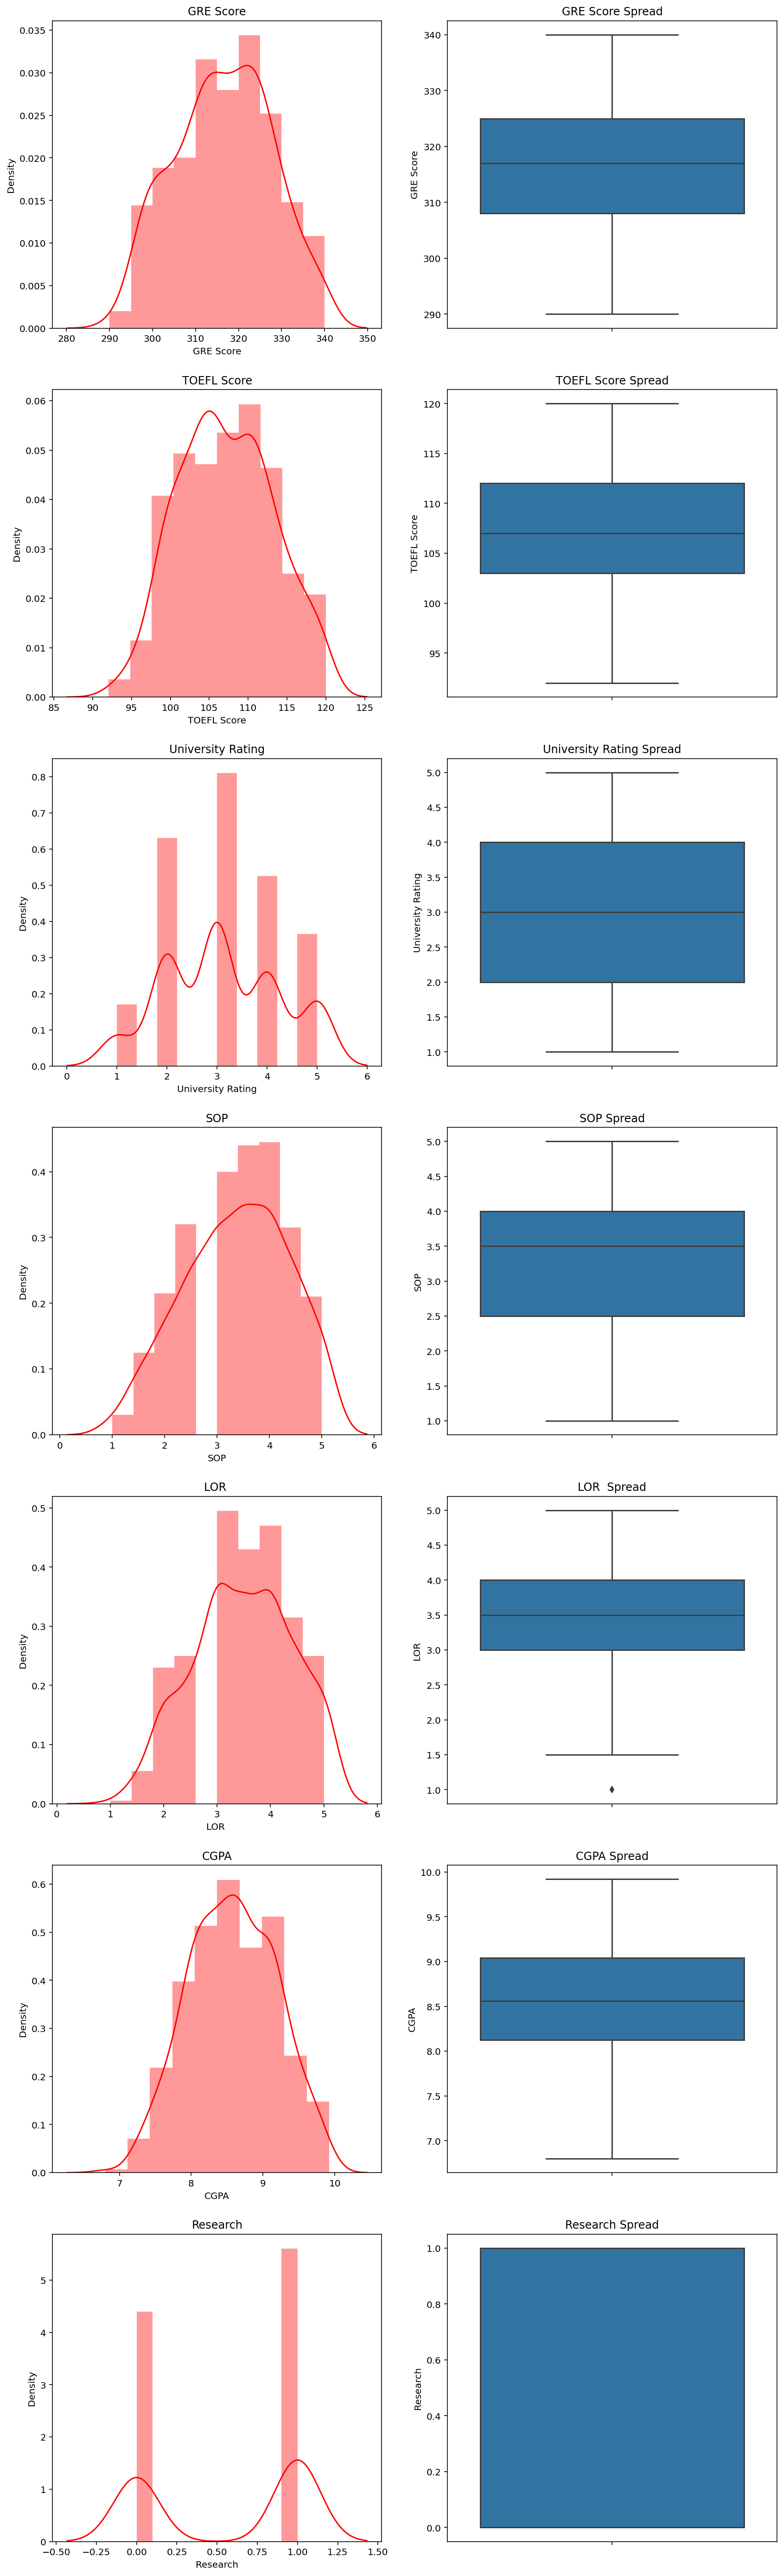

In [138]:
plt.figure(figsize=(14, 50))

cols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
i=0
for j in range(len(cols)):
  for f in range(2):
    i=i+1
    if i==15:
      break
    elif i %2 !=0:
      print("j=elks::",j)
      plt.subplot(7, 2, i)
      sns.distplot(df[cols[j]],bins=10, color ='red' ,kde=True)
      plt.title(cols[j])
    else:
      plt.subplot(7, 2, i)
      plt.title(cols[j] + ' Spread')
      sns.boxplot(y=df[cols[j]])

We can see that the , there are no outliers detected , and in LOR , there are little amount of outliers detected, and no data is removed , since the data in dataframe is less

### Graph distribution of Chance of Admit for Reasearch person

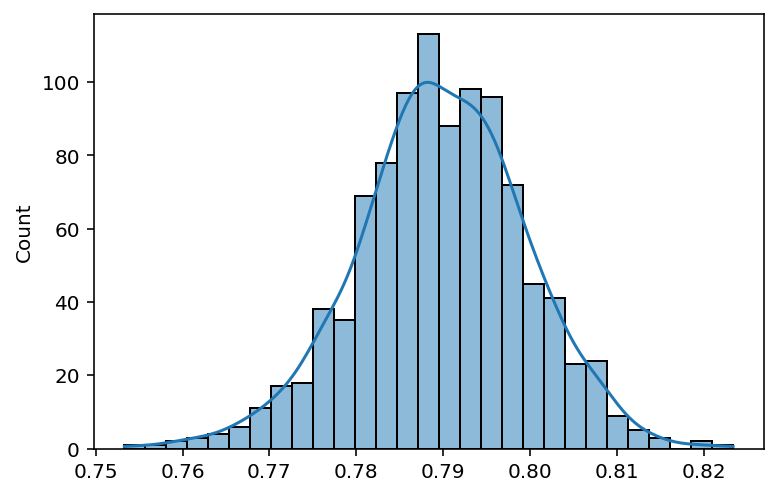

In [139]:
#Chance of Admit for Research 
sample_size = 100
collect_sample_means_research = []
for person in range(1000):
    sample_mean = df[df['Research']==1]['Chance of Admit '].sample(sample_size).mean()
    collect_sample_means_research.append(sample_mean)
sns.histplot(collect_sample_means_research, kde=True)

We can see the graph follows normal distibution, and the chance of admit increases with the Reearchers 

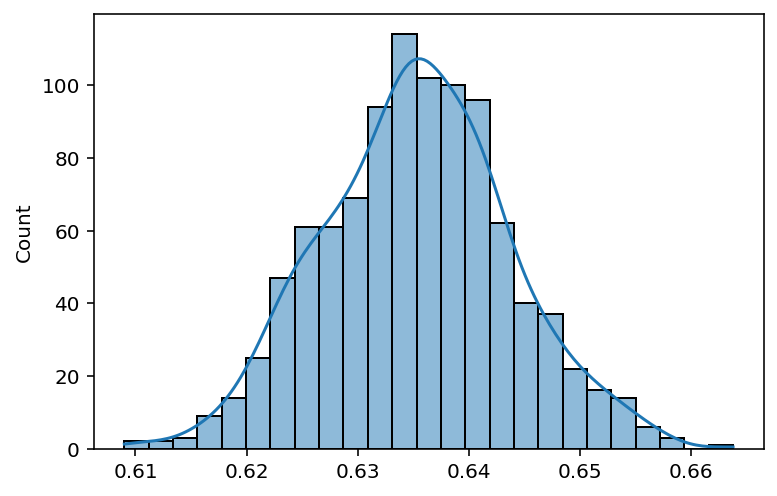

In [140]:
#Chance of Admit for Non Research 
sample_size = 100
collect_sample_means_nonresearch = []
for person in range(1000):
    sample_mean = df[df['Research']==0]['Chance of Admit '].sample(sample_size).mean()
    collect_sample_means_nonresearch.append(sample_mean)
sns.histplot(collect_sample_means_nonresearch, kde=True)

## Bivariate analysis

In [141]:
# Creating bins for chance of admit
dff= df.copy()
bins=[.10,.30,.50,.70,.90,1]
group=["very low","low","Average","Above average","high"]
dff['Chance of Admit_b']=pd.cut(dff['Chance of Admit '],bins=bins,labels=group)


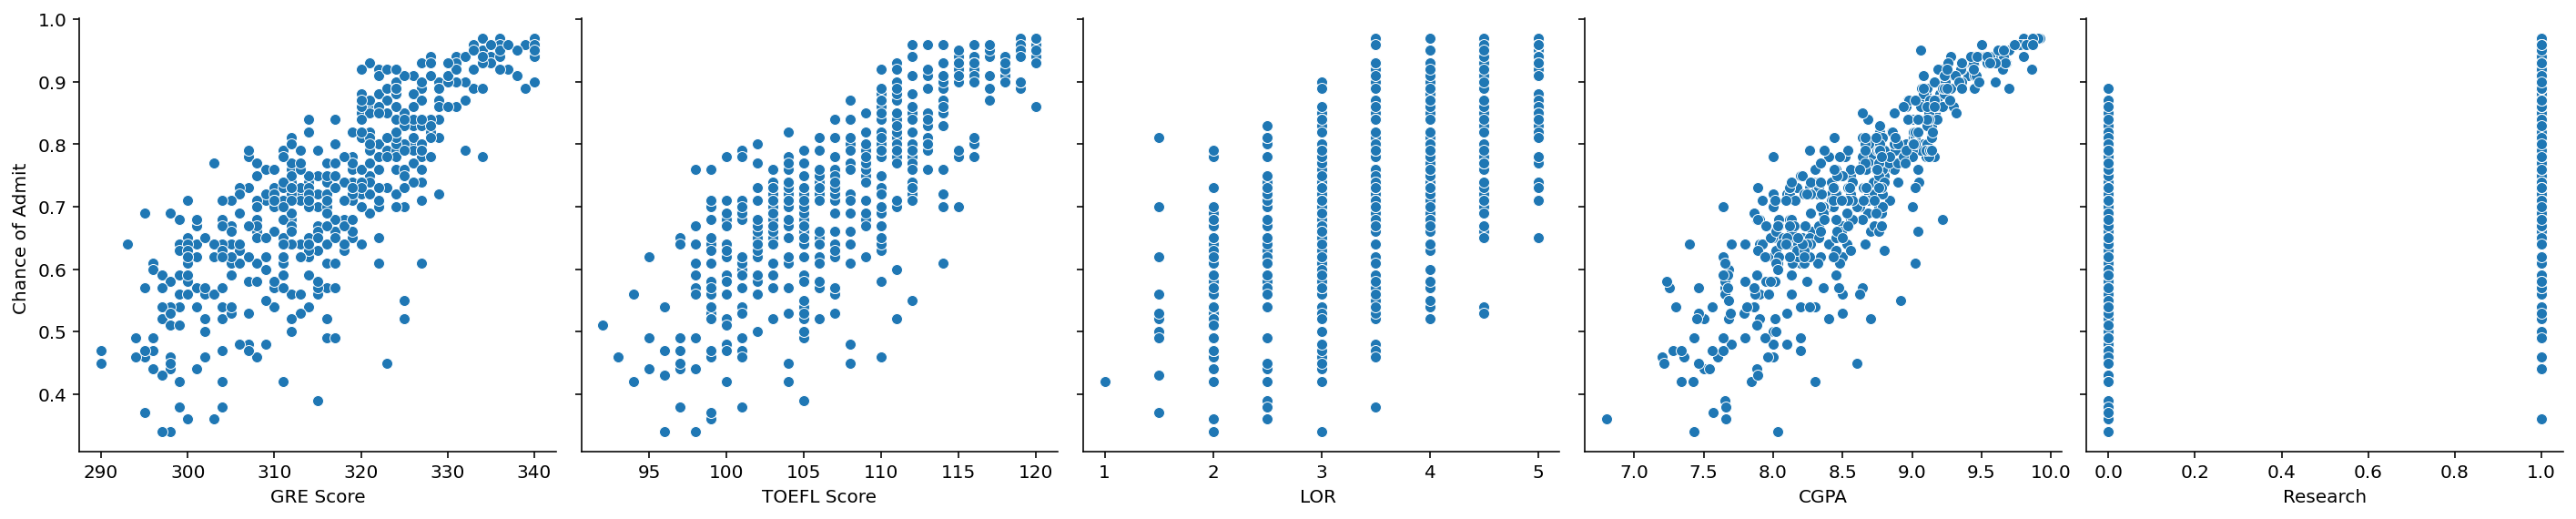

In [142]:
# Let's see how Chance of Admit are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score','LOR ', 'CGPA', 'Research'], y_vars='Chance of Admit ', height=4, aspect=1, kind='scatter')
plt.show()

From pair plot , we can see that GRE, TOFL and CGPA are mostly correlated to chance of Admit, So we can use multiple linear regression

## Crosstabs

In [143]:
#Chance_of_Admit vs CGPA
df_src= dff.groupby(["Chance of Admit_b"]).agg({"CGPA":[np.mean, "count"]})
df_src

CGPA      
                       mean count
Chance of Admit_b                
very low                NaN     0
low                7.702821    39
Average            8.170000   174
Above average      8.784513   226
high               9.523443    61

From the above crosstabs, mean for chance of admit is high and low for low chance, this means the data contains more chance of Admit data

In [144]:
#Chance_of_Admit vs TOEFL SCore
df_src= dff.groupby(["Chance of Admit_b"]).agg({"TOEFL Score":[np.mean, "count"]})
df_src

TOEFL Score      
                         mean count
Chance of Admit_b                  
very low                  NaN     0
low                 99.666667    39
Average            103.425287   174
Above average      108.955752   226
high               116.213115    61

In [145]:
#Chance_of_Admit vs GRE SCore
df_src= dff.groupby(["Chance of Admit_b"]).agg({"GRE Score":[np.mean, "count"]})
df_src

GRE Score      
                         mean count
Chance of Admit_b                  
very low                  NaN     0
low                302.333333    39
Average            308.747126   174
Above average      320.438053   226
high               332.852459    61

# Building Machine learning model


In [146]:
#Importing the basic librarires for building model

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score


from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder,StandardScaler

# Simple linear regression - Without Feature Scaling


LinearRegression()

predicting for Train


Text(0.5, 1.0, 'GRE ScoreTrain Data \nMSE: 0.01\nR^2: 0.66')

predicting for Test


Text(0.5, 1.0, 'GRE ScoreTest Data \nMSE: 0.01\nR^2: 0.62')

LinearRegression()

predicting for Train


Text(0.5, 1.0, 'CGPATrain Data \nMSE: 0.00\nR^2: 0.79')

predicting for Test


Text(0.5, 1.0, 'CGPATest Data \nMSE: 0.00\nR^2: 0.73')

LinearRegression()

predicting for Train


Text(0.5, 1.0, 'TOEFL ScoreTrain Data \nMSE: 0.01\nR^2: 0.64')

predicting for Test


Text(0.5, 1.0, 'TOEFL ScoreTest Data \nMSE: 0.01\nR^2: 0.54')

LinearRegression()

predicting for Train


Text(0.5, 1.0, 'SOPTrain Data \nMSE: 0.01\nR^2: 0.47')

predicting for Test


Text(0.5, 1.0, 'SOPTest Data \nMSE: 0.01\nR^2: 0.46')

LinearRegression()

predicting for Train


Text(0.5, 1.0, 'LOR Train Data \nMSE: 0.01\nR^2: 0.44')

predicting for Test


Text(0.5, 1.0, 'LOR Test Data \nMSE: 0.01\nR^2: 0.28')

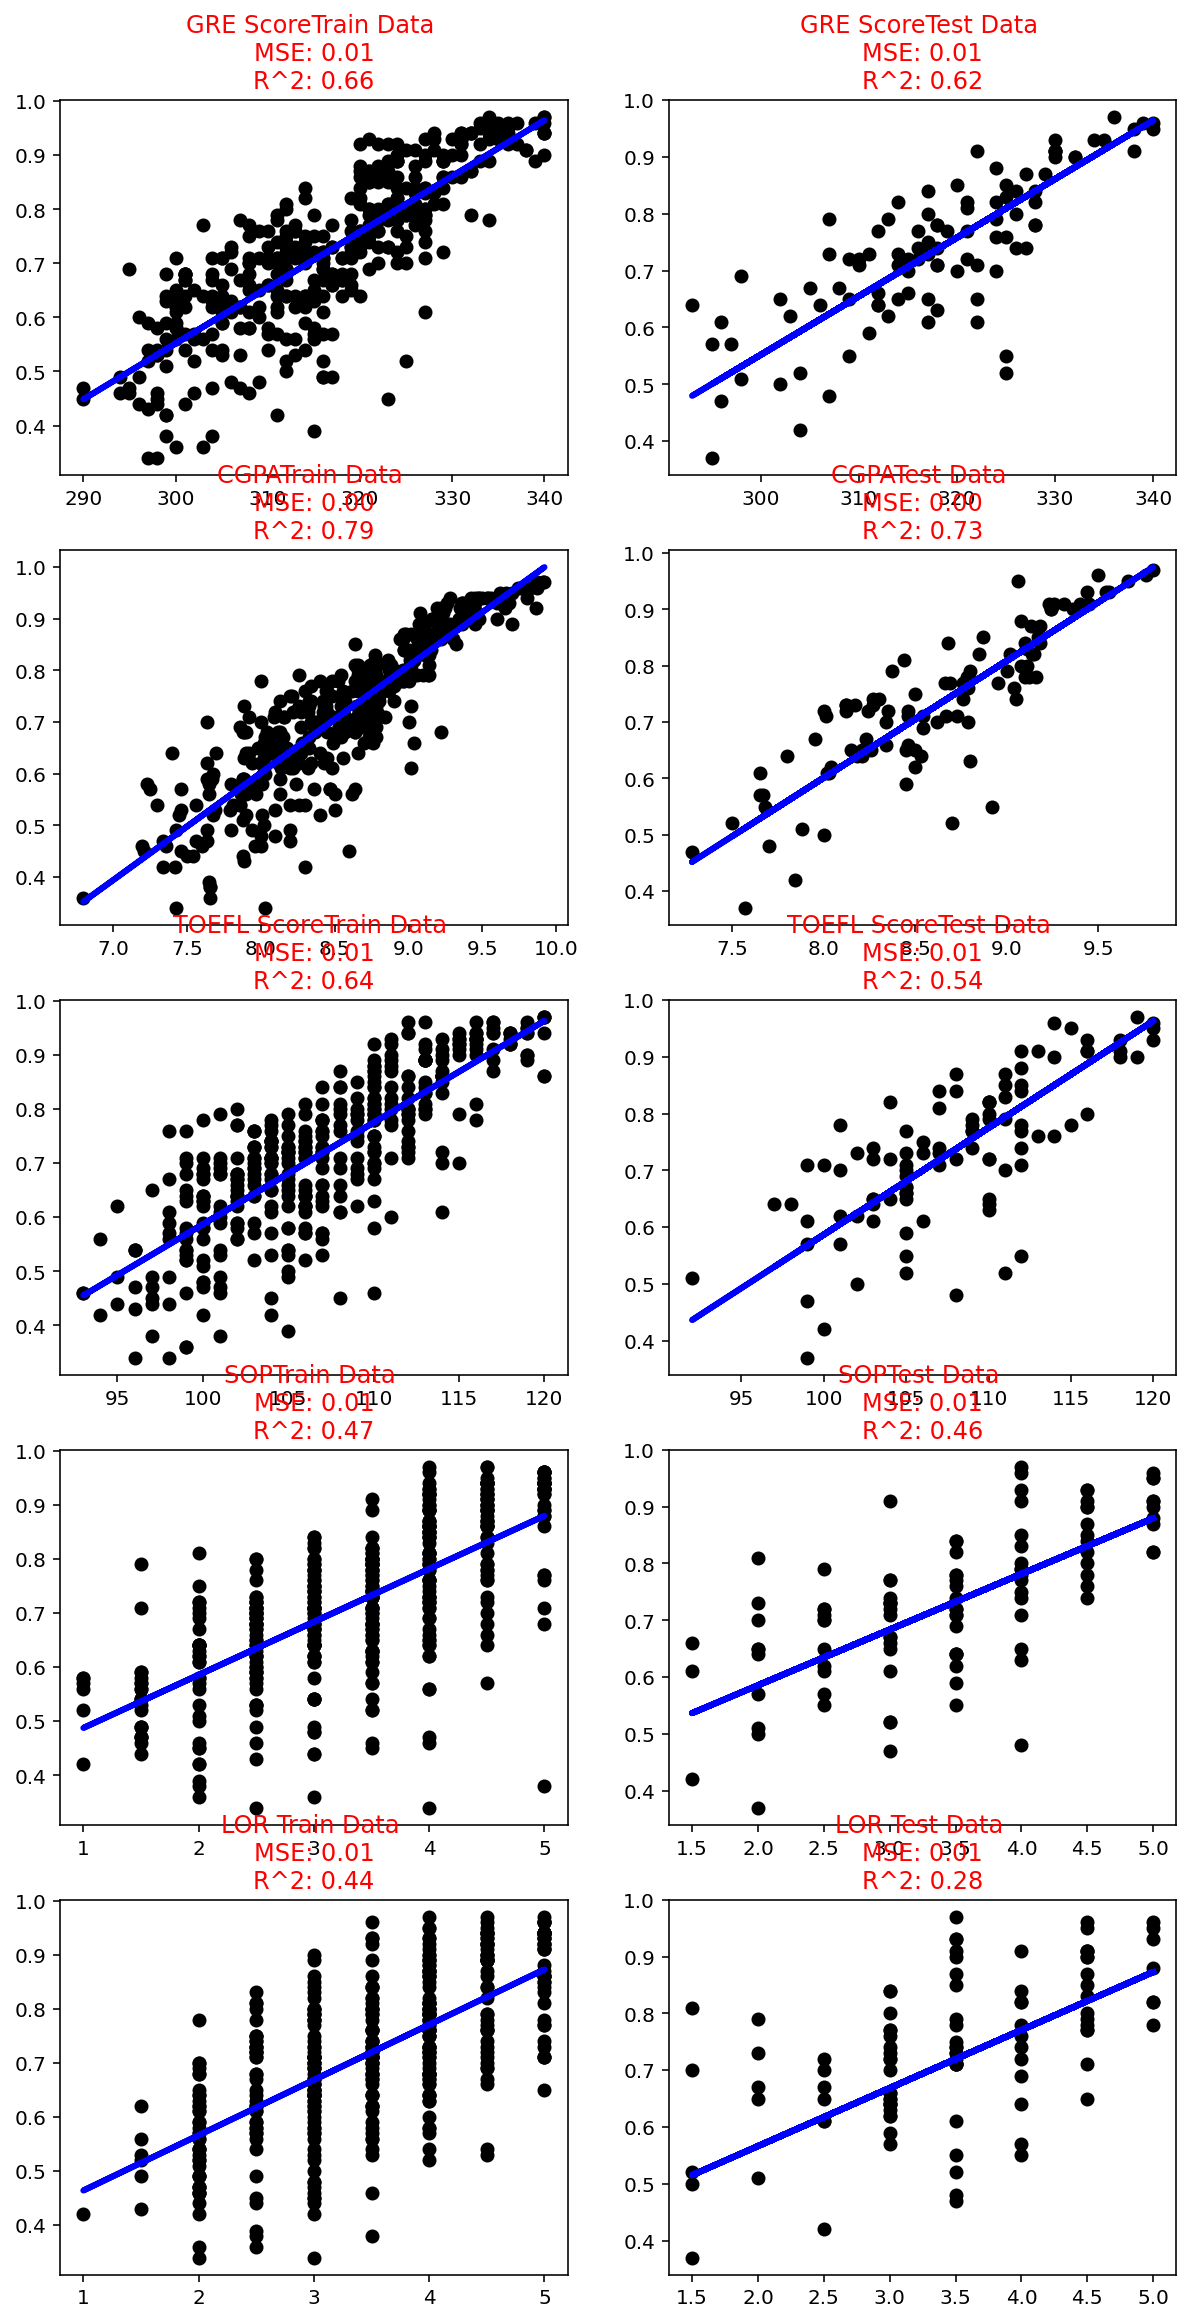

In [147]:
f= ['GRE Score', 'CGPA','TOEFL Score','SOP','LOR ']
c=0
#plt.figure(figsize=(10, 20))
fig, axs = plt.subplots(5,2,figsize=(10,20))



for i in range(len(f)):
  x = np.array(df[f[i]]).reshape(-1, 1)
  y = np.array(df['Chance of Admit '])
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101) 
  # Create a linear regression model
  model = LinearRegression()

  # Train the model on the training data
  model.fit(x_train.reshape(-1, 1), y_train)

  for j in range(2):
    c+=1
    if j==0:

      print("predicting for Train")
      
      # Predict the output for the train data
      y_pred_train = model.predict(x_train.reshape(-1, 1))

      #Calculate the mean squared error and R^2 score for train
      mse_train = mean_squared_error(y_train, y_pred_train)
      r2_train = r2_score(y_train, y_pred_train)
      

      axs[i,j].scatter(x_train,y_train, color='black')
      axs[i,j].plot(x_train, y_pred_train, color='blue', linewidth=3)
      axs[i,j].set_title(f"{f[i]}Train Data \nMSE: {mse_train:.2f}\nR^2: {r2_train:.2f}",color='red')

    



    else:
      print("predicting for Test")

      # Predict the output for the test data
      y_pred_test = model.predict(x_test.reshape(-1, 1))

      # Calculate the mean squared error and R^2 score for test data
      mse_test = mean_squared_error(y_test, y_pred_test)
      r2_test = r2_score(y_test, y_pred_test)
  

      axs[i,j].scatter(x_test,y_test, color='black')
      axs[i,j].plot(x_test, y_pred_test, color='blue', linewidth=3)
      axs[i,j].set_title(f"{f[i]}Test Data \nMSE: {mse_test:.2f}\nR^2: {r2_test:.2f}",color='red')

    


plt.show()   
print()
print()


    

From the above graphs , test and train samples graph , model is underfitted , due to low R2 score in both test and train datas So , we need to check by scaling the feature datas

## Simple linear regression with Feature Scaling

LinearRegression()

predicting for Train


'\n      # plotting\n      plt.subplot(3, 2, c)\n      plt.scatter(x_train,y_train)\n      plt.plot(x_train,y_pred_train,\'r\');\n      plt.xlabel("X")\n      plt.ylabel("Y")\n      plt.title("Linear Regression Model (Training Data)")\n      axs[0,1].text(2,8,"My Text", fontsize=14, color=\'red\')\n      #plt.text(-1,-1 , f"MSE: {mse_train:.2f}\nR^2: {r2_train:.2f}")'

Text(0.5, 1.0, 'GRE Score\nTraning Data \nMSE: 0.01\nR^2: 0.66')

predicting for Test


Text(0.5, 1.0, 'GRE Score\nTest Data \nMSE: 0.01\nR^2: 0.62')

LinearRegression()

predicting for Train


'\n      # plotting\n      plt.subplot(3, 2, c)\n      plt.scatter(x_train,y_train)\n      plt.plot(x_train,y_pred_train,\'r\');\n      plt.xlabel("X")\n      plt.ylabel("Y")\n      plt.title("Linear Regression Model (Training Data)")\n      axs[0,1].text(2,8,"My Text", fontsize=14, color=\'red\')\n      #plt.text(-1,-1 , f"MSE: {mse_train:.2f}\nR^2: {r2_train:.2f}")'

Text(0.5, 1.0, 'CGPA\nTraning Data \nMSE: 0.00\nR^2: 0.79')

predicting for Test


Text(0.5, 1.0, 'CGPA\nTest Data \nMSE: 0.00\nR^2: 0.73')

LinearRegression()

predicting for Train


'\n      # plotting\n      plt.subplot(3, 2, c)\n      plt.scatter(x_train,y_train)\n      plt.plot(x_train,y_pred_train,\'r\');\n      plt.xlabel("X")\n      plt.ylabel("Y")\n      plt.title("Linear Regression Model (Training Data)")\n      axs[0,1].text(2,8,"My Text", fontsize=14, color=\'red\')\n      #plt.text(-1,-1 , f"MSE: {mse_train:.2f}\nR^2: {r2_train:.2f}")'

Text(0.5, 1.0, 'TOEFL Score\nTraning Data \nMSE: 0.01\nR^2: 0.64')

predicting for Test


Text(0.5, 1.0, 'TOEFL Score\nTest Data \nMSE: 0.01\nR^2: 0.54')

LinearRegression()

predicting for Train


'\n      # plotting\n      plt.subplot(3, 2, c)\n      plt.scatter(x_train,y_train)\n      plt.plot(x_train,y_pred_train,\'r\');\n      plt.xlabel("X")\n      plt.ylabel("Y")\n      plt.title("Linear Regression Model (Training Data)")\n      axs[0,1].text(2,8,"My Text", fontsize=14, color=\'red\')\n      #plt.text(-1,-1 , f"MSE: {mse_train:.2f}\nR^2: {r2_train:.2f}")'

Text(0.5, 1.0, 'SOP\nTraning Data \nMSE: 0.01\nR^2: 0.47')

predicting for Test


Text(0.5, 1.0, 'SOP\nTest Data \nMSE: 0.01\nR^2: 0.46')

LinearRegression()

predicting for Train


'\n      # plotting\n      plt.subplot(3, 2, c)\n      plt.scatter(x_train,y_train)\n      plt.plot(x_train,y_pred_train,\'r\');\n      plt.xlabel("X")\n      plt.ylabel("Y")\n      plt.title("Linear Regression Model (Training Data)")\n      axs[0,1].text(2,8,"My Text", fontsize=14, color=\'red\')\n      #plt.text(-1,-1 , f"MSE: {mse_train:.2f}\nR^2: {r2_train:.2f}")'

Text(0.5, 1.0, 'LOR \nTraning Data \nMSE: 0.01\nR^2: 0.44')

predicting for Test


Text(0.5, 1.0, 'LOR \nTest Data \nMSE: 0.01\nR^2: 0.28')

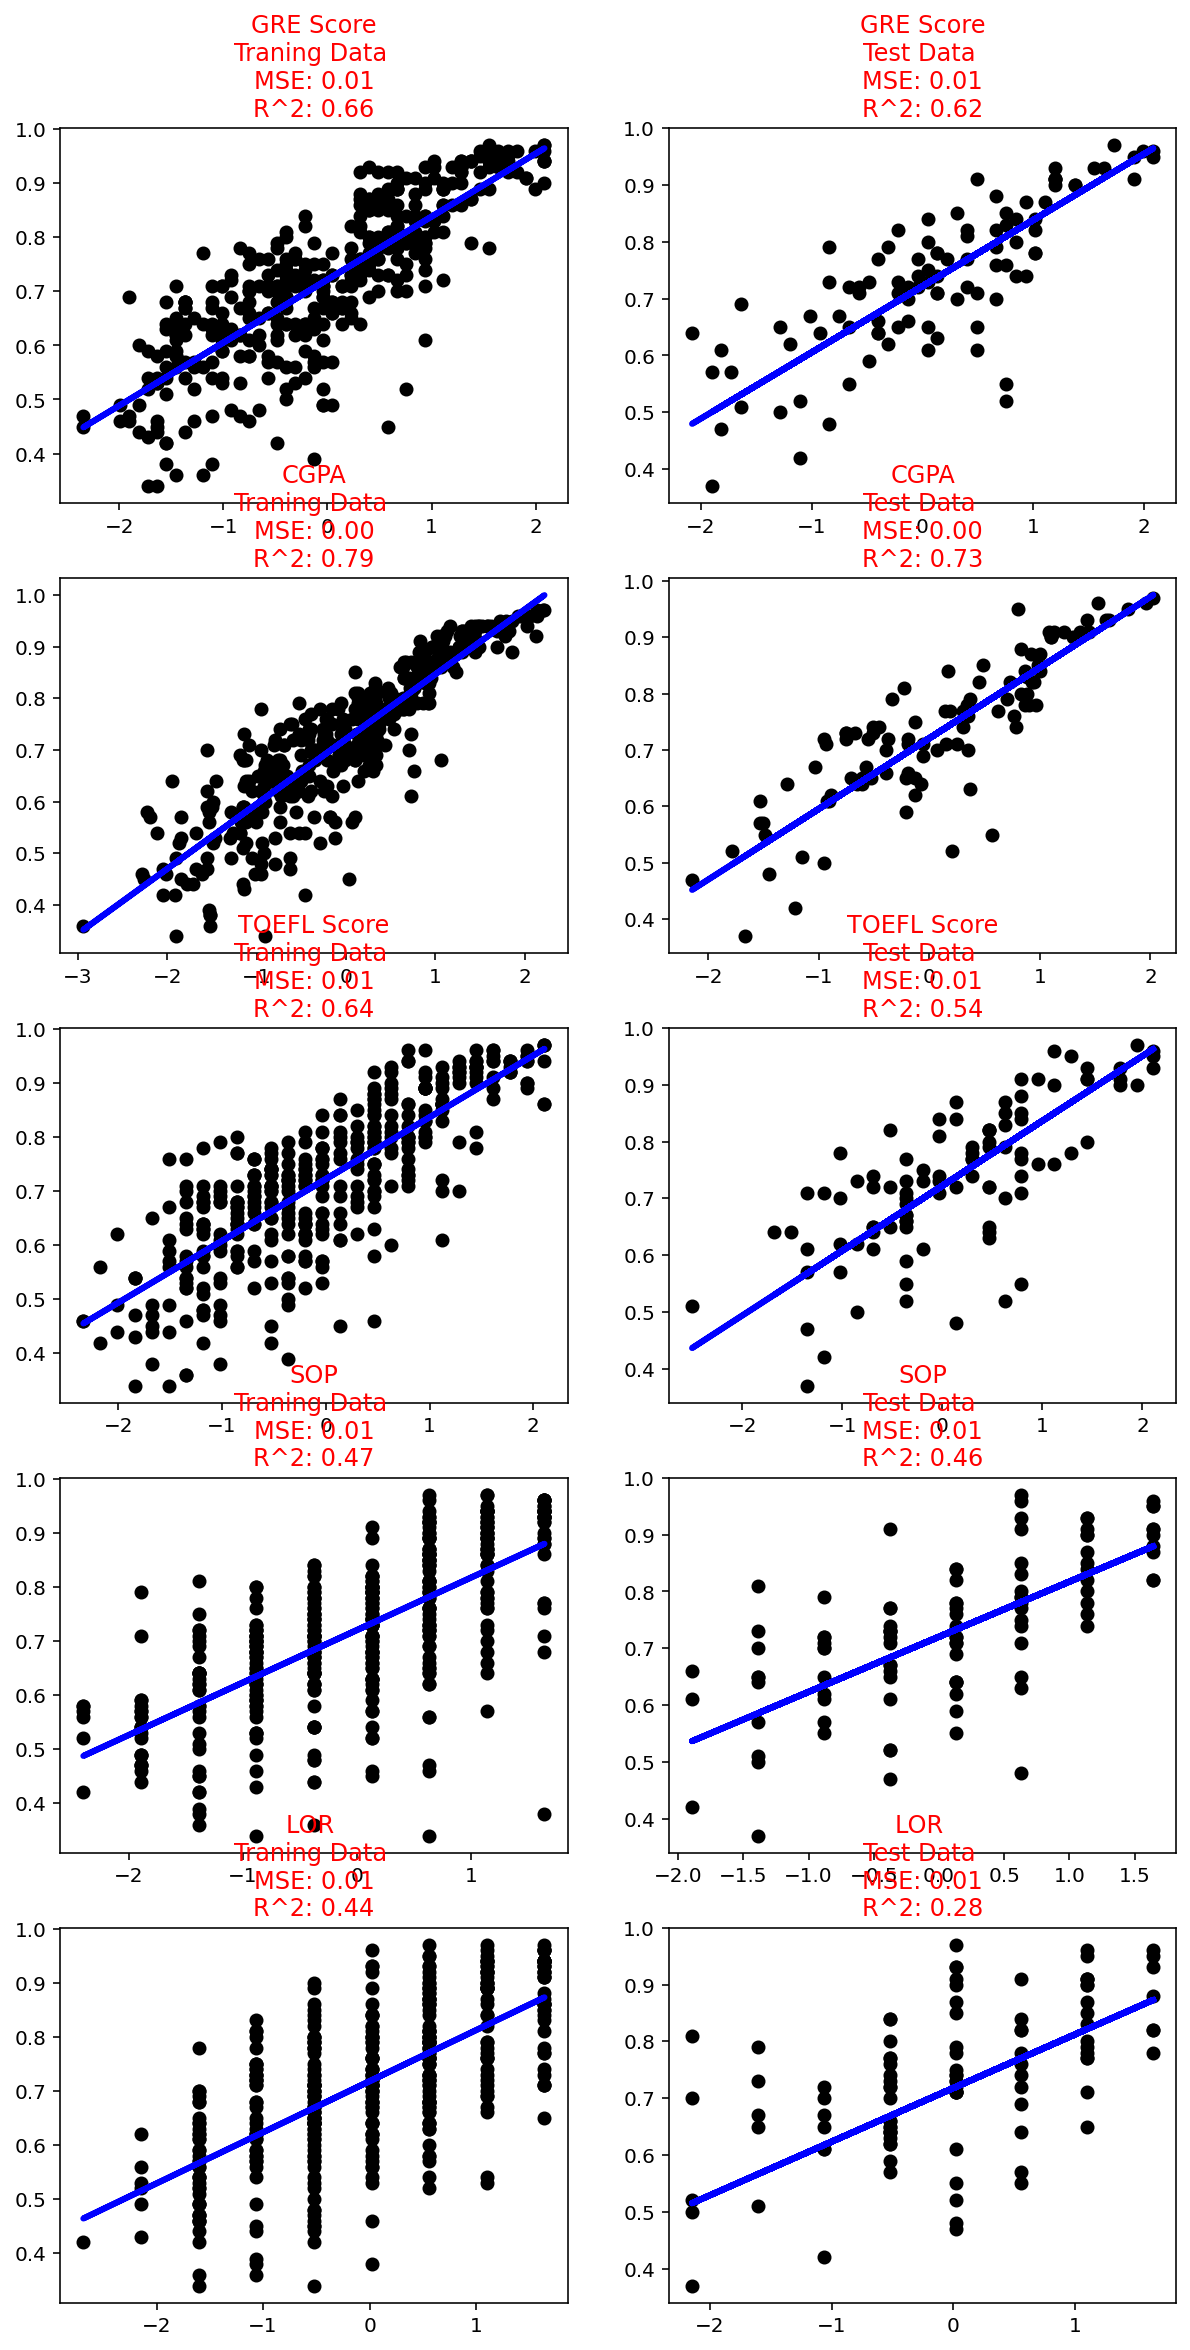

'\nfrom sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score\nprint(f"Mean absolute error (MAE) is: {mean_absolute_error(y_test,pred_lm).round(3)}\nMean squared error (MSE) is: {mean_squared_error(y_test,pred_lm).round(3)}\nRoot Mean Squared error (RMSE) is: {np.sqrt(mean_squared_error(y_test,pred_lm)).round(3)}\nExplained Variance Score is: {explained_variance_score(y_test,pred_lm).round(3)}\nR-squared for transformed target variable is: {r2_score(y_test,pred_lm).round(3)}")'

In [148]:
f= ['GRE Score', 'CGPA','TOEFL Score','SOP','LOR ']
c=0
#plt.figure(figsize=(10, 20))
fig, axs = plt.subplots(5,2,figsize=(10,20))




for i in range(len(f)):
  x = np.array(df[f[i]]).reshape((-1, 1))
  y = np.array(df['Chance of Admit '])

  # Feature Scaling
  Scaler= StandardScaler()
  X=Scaler.fit_transform(x)

  x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101) 
  # Create a linear regression model
  model = LinearRegression()

  # Train the model on the training data
  model.fit(x_train.reshape(-1, 1), y_train)
  for j in range(2):
    c+=1
    if j==0:

      print("predicting for Train")
      
      # Predict the output for the train data
      y_pred_train = model.predict(x_train.reshape(-1, 1))

      #Calculate the mean squared error and R^2 score for train
      mse_train = mean_squared_error(y_train, y_pred_train)
      r2_train = r2_score(y_train, y_pred_train)
      '''
      # plotting
      plt.subplot(3, 2, c)
      plt.scatter(x_train,y_train)
      plt.plot(x_train,y_pred_train,'r');
      plt.xlabel("X")
      plt.ylabel("Y")
      plt.title("Linear Regression Model (Training Data)")
      axs[0,1].text(2,8,"My Text", fontsize=14, color='red')
      #plt.text(-1,-1 , f"MSE: {mse_train:.2f}\nR^2: {r2_train:.2f}")'''

      axs[i,j].scatter(x_train,y_train, color='black')
      axs[i,j].plot(x_train, y_pred_train, color='blue', linewidth=3)
      axs[i,j].set_title(f"{f[i]}\nTraning Data \nMSE: {mse_train:.2f}\nR^2: {r2_train:.2f}",color='red')
    



    else:
      print("predicting for Test")

      # Predict the output for the test data
      y_pred_test = model.predict(x_test.reshape(-1, 1))

      # Calculate the mean squared error and R^2 score for test data
      mse_test = mean_squared_error(y_test, y_pred_test)
      r2_test = r2_score(y_test, y_pred_test)
  

      axs[i,j].scatter(x_test,y_test, color='black')
      axs[i,j].plot(x_test, y_pred_test, color='blue', linewidth=3)
      axs[i,j].set_title(f"{f[i]}\nTest Data \nMSE: {mse_test:.2f}\nR^2: {r2_test:.2f}",color='red')


plt.show()   
print()
print()
'''
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
print(f"Mean absolute error (MAE) is: {mean_absolute_error(y_test,pred_lm).round(3)}\n\
Mean squared error (MSE) is: {mean_squared_error(y_test,pred_lm).round(3)}\n\
Root Mean Squared error (RMSE) is: {np.sqrt(mean_squared_error(y_test,pred_lm)).round(3)}\n\
Explained Variance Score is: {explained_variance_score(y_test,pred_lm).round(3)}\n\
R-squared for transformed target variable is: {r2_score(y_test,pred_lm).round(3)}")'''
    

We can see se that , after scaling the R2 score for CGPA feature increased , but for other featiures it is decreased

# Multiple Linear Regression

### Train-Test Split
We now need to split our variable into training and testing sets. We'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset

In [149]:
from sklearn.model_selection import train_test_split
#Defined X value and y value , and split the data train
X = df.drop(columns=['Chance of Admit ', 'Serial No.'])         
Y = df["Chance of Admit "]    # y = price

# split the data train and test
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X, Y, test_size=0.20, random_state=42)

print("X Train : ", X_train_0.shape)
print("X Test  : ", X_test_0.shape)
print("Y Train : ", Y_train_0.shape)
print("Y Test  : ", Y_test_0.shape)

X Train :  (400, 7)
X Test  :  (100, 7)
Y Train :  (400,)
Y Test  :  (100,)


### Building model for Linear regression

### We can perform multiple linear regression

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn 

y  is the response

c  is the intercept

m1  is the coefficient for the first feature

mn  is the coefficient for the nth feature

In our case:

For now , we ll take all the independent variables
y=c+m1×CGPA + m2xTOEFL + m3xGRE + m4xLOR + m5xResearch
The  m  values are called the model coefficients or model parameters.

In [150]:
#Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Checking Multicolinearity


In [151]:

import statsmodels.api as sm

# fit the linear regression model
model = sm.OLS(X_train_0, Y_train_0).fit()

# get the variance inflation factor (VIF) for each predictor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print the VIF values
for i, v in enumerate(vif):
    print(f"VIF for predictor {i}: {v}")

VIF for predictor 0: 1308.0610888465158
VIF for predictor 1: 1215.9518983651624
VIF for predictor 2: 20.933360945720892
VIF for predictor 3: 35.265005604600034
VIF for predictor 4: 30.91147635400442
VIF for predictor 5: 950.8179853694207
VIF for predictor 6: 2.8694933174820076


The OLS function is used to fit the linear regression model, and the variance_inflation_factor function is used to calculate the VIF for each predictor. A VIF of 1 indicates that there is no multicollinearity, while a VIF greater than 1 indicates that there is multicollinearity. Typically, a VIF greater than 5 is considered to be high.

## Fixing multicolinearity

In [152]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# create a PCA object with the number of components equal to the number of predictors
pca = PCA(n_components=X.shape[1])

# fit the PCA object to the data
pca.fit(X)

# transform the data to the principal components
X_pca = pca.transform(X)

# fit a linear regression model using the principal components as predictors
LR = LinearRegression().fit(X_pca, y)

PCA(n_components=7)

In [153]:
#LR = LinearRegression()
LR.fit(X_train_0,Y_train_0)
ypred_0 = LR.predict(X_test_0)
print()
print()
print(f"Train accuracy {round(LR.score(X_train_0,Y_train_0) * 100, 2)} %")
print(f"Test accuracy {round(LR.score(X_test_0,Y_test_0) * 100, 2)} %")
print()
print()
print("r2 Score:",r2_score(Y_test_0,ypred_0)*100)
print("Linear Regression Score:::::",LR.score(X_test_0,Y_test_0)*100)




LinearRegression()



Train accuracy 82.11 %
Test accuracy 81.88 %


r2 Score: 81.88432567829629
Linear Regression Score::::: 81.88432567829629


In [154]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

print(f"Mean absolute error (MAE) is: {mean_absolute_error(Y_test_0,ypred_0).round(3)}\n\
Mean squared error (MSE) is: {mean_squared_error(Y_test_0,ypred_0).round(3)}\n\
Root Mean Squared error (RMSE) is: {np.sqrt(mean_squared_error(Y_test_0,ypred_0)).round(3)}\n\
Explained Variance Score is: {explained_variance_score(Y_test_0,ypred_0).round(3)}\n\
R-squared for transformed target variable is: {r2_score(Y_test_0,ypred_0).round(3)}")

Mean absolute error (MAE) is: 0.043
Mean squared error (MSE) is: 0.004
Root Mean Squared error (RMSE) is: 0.061
Explained Variance Score is: 0.82
R-squared for transformed target variable is: 0.819


We can see the R2 score improved , when performing multiple linear regression R2 score is 82

## Scaling with StandardScaler for All features

In [155]:
Sc_df=df.copy()

In [156]:
A = Sc_df.drop(columns=['Chance of Admit ', 'Serial No.'])         
B = Sc_df["Chance of Admit "]    # y = Chance of Admit

In [157]:
Scaler= StandardScaler()
A=Scaler.fit_transform(A)
A

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [158]:
# split the data train and test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(A, B, test_size=0.20, random_state=42)

print("X Train Scaler : ", X_train_s.shape)
print("X Test Scaler : ", X_test_s.shape)
print("Y Train Scaler : ", y_train_s.shape)
print("Y Test  Scaler : ", y_test_s.shape)

X Train Scaler :  (400, 7)
X Test Scaler :  (100, 7)
Y Train Scaler :  (400,)
Y Test  Scaler :  (100,)


In [159]:
LR = LinearRegression()
LR.fit(X_train_s,y_train_s)
ypred = LR.predict(X_test_s)

LinearRegression()

In [160]:
print("r2 Score:",r2_score(y_test_s,ypred)*100)
print("Linear Regression Score:::::",LR.score(X_test_s,y_test_s)*100)

r2 Score: 81.88432567829629
Linear Regression Score::::: 81.88432567829629


In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

print(f"Mean absolute error (MAE) is: {mean_absolute_error(y_test_s,ypred).round(3)}\n\
Mean squared error (MSE) is: {mean_squared_error(y_test_s,ypred).round(3)}\n\
Root Mean Squared error (RMSE) is: {np.sqrt(mean_squared_error(y_test_s,ypred)).round(3)}\n\
Explained Variance Score is: {explained_variance_score(y_test_s,ypred).round(3)}\n\
R-squared for transformed target variable is: {r2_score(y_test_s,ypred).round(3)}")

Mean absolute error (MAE) is: 0.043
Mean squared error (MSE) is: 0.004
Root Mean Squared error (RMSE) is: 0.061
Explained Variance Score is: 0.82
R-squared for transformed target variable is: 0.819


WE also checked , with scaling the feature variable , and the ,model performed well, and the R@ score is 81

## Feature selection using Recursive Feature Elimination


We now, try getting the feature using the REcursive Feature selection  of Sklearn library to get the best feature for our model

RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [162]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [163]:
A = Sc_df.drop(columns=['Chance of Admit ', 'Serial No.'])         
B = Sc_df["Chance of Admit "]    # y = Chance of Admit

# split the data train and test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(A, B, test_size=0.20, random_state=42)

# Running RFE with the output number of the variable equal to 5
lm = LinearRegression()
lm.fit(X_train_1, y_train_1)


rfe = RFE(lm,n_features_to_select=5)             # running RFE
rfe = rfe.fit(X_train_1, y_train_1)

LinearRegression()

WE tried to get the best 5 features suitable for our model 

In [164]:
list(zip(X_train_1.columns,rfe.support_,rfe.ranking_))

[('GRE Score', False, 2),
 ('TOEFL Score', True, 1),
 ('University Rating', True, 1),
 ('SOP', False, 3),
 ('LOR ', True, 1),
 ('CGPA', True, 1),
 ('Research', True, 1)]

In [165]:
col = X_train_1.columns[rfe.support_]
col

Index(['TOEFL Score', 'University Rating', 'LOR ', 'CGPA', 'Research'], dtype='object')

From RFE , we received fearutes like LOR and CGPA , and Research as best features , we ll try to continue building model and predict with the features given by RFE

In [166]:
X_train_1.columns[~rfe.support_]

Index(['GRE Score', 'SOP'], dtype='object')

In [167]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_1[col]

In [168]:
X_train_rfe

,TOEFL Score,University Rating,LOR,CGPA,Research
249,111,3,4.0,8.83,1
433,111,4,5.0,8.54,0
19,102,3,3.0,8.50,0
322,107,2,4.0,8.27,0
332,106,3,2.5,8.21,1
...,...,...,...,...,...
106,111,4,4.5,9.18,1
270,105,2,3.0,8.22,1
348,99,1,2.0,7.25,0
435,105,2,4.0,7.68,0


## Building Linear Model using 'STATS MODEL' with RFE selected variables

### Checking VIF-Variance influence factor

In [169]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,CGPA,682.61
0,TOEFL Score,603.76
2,LOR,26.73
1,University Rating,15.30
4,Research,2.80


In [170]:
import statsmodels.api as sm

# Add a constant to the independent variable
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a linear regression model
model = sm.OLS(y_train_1, X_train_lm1)

# Fit the model
results = model.fit()

# Print the summary of the model's statistics
print(results.summary())

# Print the coefficients and p-values
print(results.params)
print(results.pvalues)

# Print the R-squared
print(results.rsquared)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     342.6
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          5.48e-141
Time:                        14:17:51   Log-Likelihood:                 553.10
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     394   BIC:                            -1070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0068      0.07

# Observations



- There are 500 rows and 9 columns present in dataset
- Serial no column is not used for ML model
- University rating 3 is highest with 162 counts present in dataset
- SOP with count 89 is highest in count in dates
- LOR with 99 counts highest in dataset
- CGPA with 8.76 is highest having 9 counts
- There are 280 research and 220 non research data 
- And positive chance of Admit count present highest in dataset
- TOEFL,GRE.SOP,LOR,CGPA. follows normal distribution
- From pair plot , we can see GRE, TOEFL , and CGPA has high influence in the Chance of Admit
- From Crosstabs ,we can see that the mean of high CGPa candidates having chance of Admit is huge than less CGPA
- We also see, the R2 score is less without scaling and with scaling , the score increases
- We also checked the multicollinearity and implemented steps to overcome multicolinearity

# Recommendations


- As we checked the dataset , implemented linear regression model, CGPA has high VIF
- Also TOEFL score has high VIF , and can used as a desired feature to predict the chance of Admit
- When checked with RFE-Recursive Feature Elimination , we eliminated other features like GRE Score, SOP , and did building the model
- R2 Score we got , after scaling , checking multicollinearity, implementing RFE , is 81, and this is good and best score
- WE received high R2 score in stats model with RFE selected features than sklearn library with all features
- So Best Features, to predict the Chance of Admit is CGPA and TOEFL Score